<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-no-supervisado/blob/main/Aprendizaje_no_supervisado%20K%20means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervizado: Aplicaciones al clustering en Industiras

## 0. Cargar Bibliotecas

In [1]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.2)


In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler  #estandarizar varibles
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#from google.colab import files  #funcion para subir archivo csv a google colab

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Subir archivo de datos

In [ ]:
#files.upload()

## Leer datos 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Aprendizaje-no-supervisado/main/Datos/train_input_2yaM34J.csv',
                    index_col=['ID'],
                    parse_dates=['Date']
                 )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8000 non-null   datetime64[ns]
 1   Temperature  8000 non-null   float64       
 2   Humidity     8000 non-null   float64       
 3   Humex        8000 non-null   float64       
 4   CO2          8000 non-null   float64       
 5   Bright       8000 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 437.5 KB


# Exploración de datos

In [6]:
datos = df.copy()
datos.drop(['Date'],axis= 1, inplace=True)
datos.head(3)

,Temperature,Humidity,Humex,CO2,Bright
ID,,,,,
0,22.7,56.0,25.7,534.0,1.0
1,22.8,55.0,25.7,506.0,1.0
2,22.9,55.0,25.9,577.0,1.0


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Humex        8000 non-null   float64
 3   CO2          8000 non-null   float64
 4   Bright       8000 non-null   float64
dtypes: float64(5)
memory usage: 375.0 KB


## ¿Existen casos faltantes?




En caso afirmativo:
1. Remover renglones con valores faltantes

  `dropna()`
2. Imputar valores faltante con el promedio, la mediana o la moda de la columna.

  `fillna(df.columna.mean()`
3. Valor estimado mediante otro modelo de aprendizaje de máquina.

In [ ]:
datos.isna().sum()

Temperature    0
Humidity       0
Humex          0
CO2            0
Bright         0
dtype: int64

In [44]:
datos.describe()

,Temperature,Humidity,Humex,CO2,Bright
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,22.94535,33.790750,22.668763,586.471000,41.596375
std,1.62307,8.241068,2.578996,202.641522,76.855898
min,17.90000,16.000000,15.500000,361.000000,1.000000
25%,22.10000,27.000000,21.100000,452.000000,1.000000
50%,23.20000,33.000000,22.800000,493.000000,1.000000
75%,24.10000,41.000000,24.300000,693.250000,58.000000
max,28.30000,58.000000,32.100000,2168.000000,882.000000


## Distribución y correlación entre variables

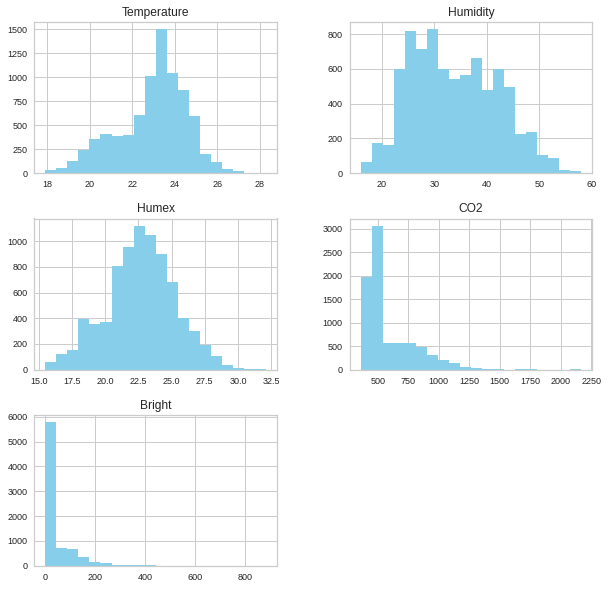

In [46]:
datos.hist(figsize = (10,10), xlabelsize=9, ylabelsize=9,
                               color='skyblue', bins=20)
plt.show()

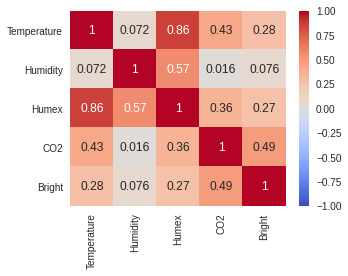

In [47]:
def correlacion(dataframe, grafica = True):
    corr=dataframe.corr()                #creamos la matriz de correlación
    fig = plt.figure(figsize = (5, 4))
    if grafica == True:
        sns.heatmap(corr,  cmap="coolwarm", 
                    vmin=-1, vmax=1,  center=0, 
                    annot=True, square=False)
        fig.tight_layout()
    return corr
correlaciones = correlacion(datos)

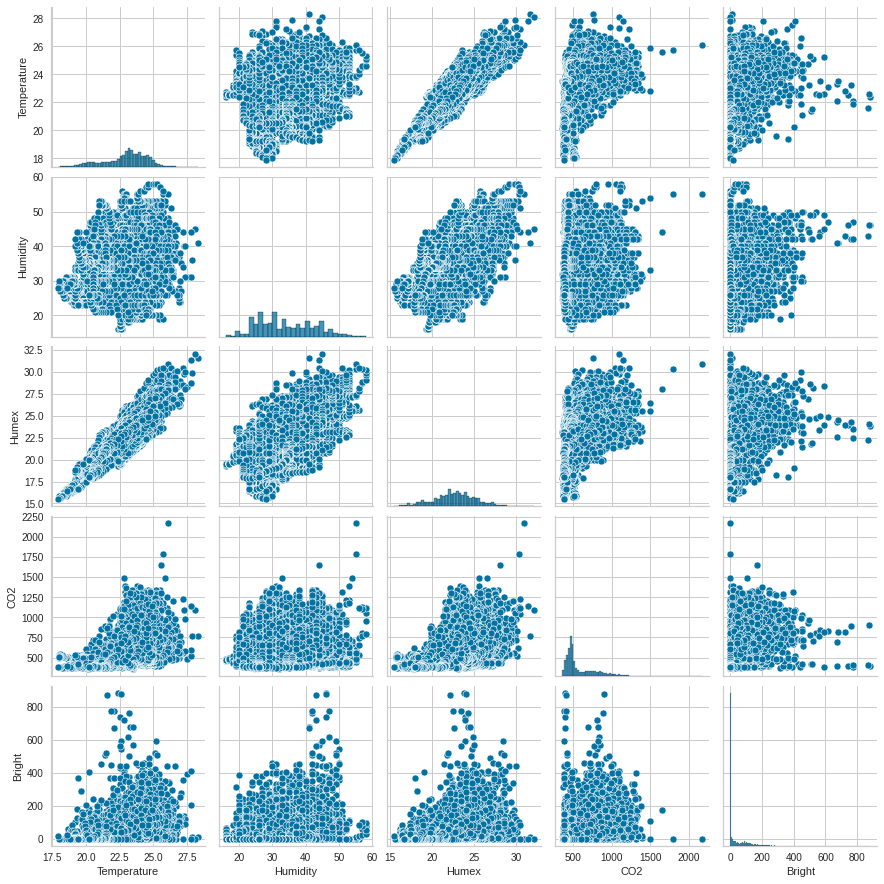

In [ ]:
g = sns.pairplot(datos, palette ='Dark2')

plt.show()

## Unificar escalas de medición de cada variable

In [8]:
datos_escalados = datos.copy()
columnas = datos.columns

#escala = MinMaxScaler()
escala = StandardScaler()

datos_escalados[columnas] = escala.fit_transform(datos[columnas])
datos_escalados

,Temperature,Humidity,Humex,CO2,Bright
ID,,,,,
0,-0.151174,2.695116,1.175429,-0.258951,-0.528247
1,-0.089558,2.573765,1.175429,-0.397135,-0.528247
2,-0.027943,2.573765,1.252984,-0.046741,-0.528247
3,0.033673,2.573765,1.330538,0.214821,-0.528247
4,0.033673,2.573765,1.330538,0.278978,-0.528247
...,...,...,...,...,...
7995,-1.506714,-0.945416,-1.655307,-0.969610,-0.476198
7996,-1.568329,-0.945416,-1.694084,-1.004156,-0.515235
7997,-1.629945,-0.945416,-1.732861,-1.033767,-0.528247


In [9]:
datos_escalados.describe()

,Temperature,Humidity,Humex,CO2,Bright
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-1.114664e-15,-2.658151e-16,-1.783407e-15,1.110639e-16,2.721740e-15
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.108716e+00,-2.158927e+00,-2.779846e+00,-1.112729e+00,-5.282472e-01
25%,-5.208664e-01,-8.240648e-01,-6.083223e-01,-6.636320e-01,-5.282472e-01
50%,1.569038e-01,-9.595837e-02,5.089024e-02,-4.612917e-01,-5.282472e-01
75%,7.114430e-01,8.748503e-01,6.325483e-01,5.269684e-01,2.134469e-01
max,3.299293e+00,2.937819e+00,3.657170e+00,7.805053e+00,1.093548e+01


# Selección del número de clústers 

### Coeficiente de Silhouette

El coeficiente de Silhouette evalúa la cercania entre puntos de un mismo cluster al mismo tiempo que la distancia a los clusters vecinos.
 
El coeficiente de Silhouette oscila entre -1 y 1 donde 1 indica un clúster de alta densidad y -1 que no existe densidad alguna.

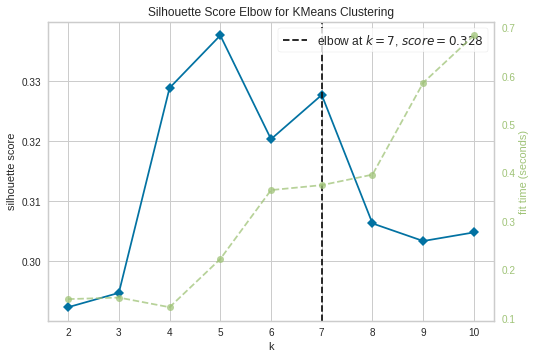

In [10]:
codo = KElbowVisualizer(KMeans(random_state=10), metric='silhouette')
codo.fit(datos_escalados.iloc[:,0:5])
codo.poof()

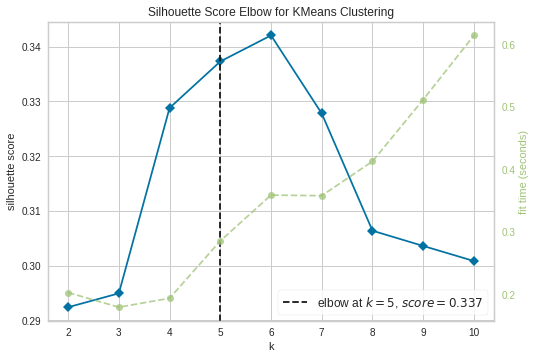

In [12]:
codo = KElbowVisualizer(KMeans(random_state=3), metric='silhouette')
codo.fit(datos_escalados.iloc[:,0:5])
codo.poof()

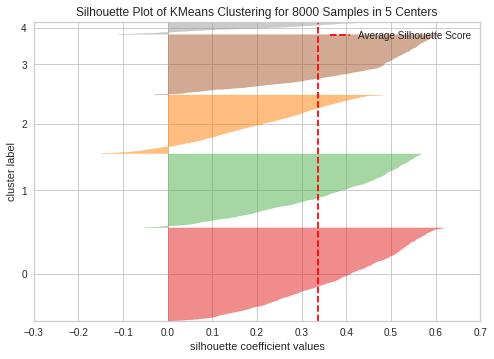

In [14]:
model = KMeans(5, random_state=3)
graf_sil = SilhouetteVisualizer(model)
graf_sil.fit(datos_escalados)
graf_sil.poof()

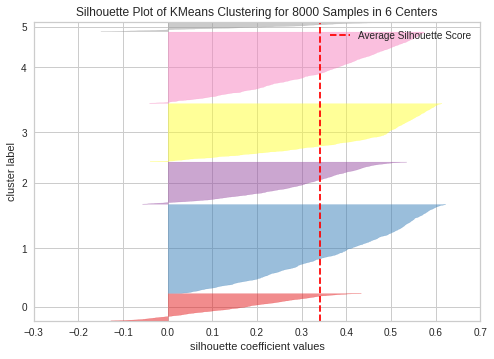

In [15]:
model = KMeans(6, random_state=3)
graf_sil = SilhouetteVisualizer(model)
graf_sil.fit(datos_escalados)
graf_sil.poof()

# K means  k = 6

In [26]:
model = KMeans(n_clusters = 6, random_state=3).fit(datos_escalados)
clusters = model.predict(datos_escalados)
clusters

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [27]:
datos['cluster'] = clusters + 1
datos

,Temperature,Humidity,Humex,CO2,Bright,cluster
ID,,,,,,
0,22.7,56.0,25.7,534.0,1.0,5
1,22.8,55.0,25.7,506.0,1.0,5
2,22.9,55.0,25.9,577.0,1.0,5
3,23.0,55.0,26.1,630.0,1.0,5
4,23.0,55.0,26.1,643.0,1.0,5
...,...,...,...,...,...,...
7995,20.5,26.0,18.4,390.0,5.0,4
7996,20.4,26.0,18.3,383.0,2.0,4
7997,20.3,26.0,18.2,377.0,1.0,4


In [29]:
datos['cluster'].value_counts(normalize=True).sort_index()*100

1     9.2000
2    29.9375
3    14.2125
4    19.5750
5    24.0375
6     3.0375
Name: cluster, dtype: float64

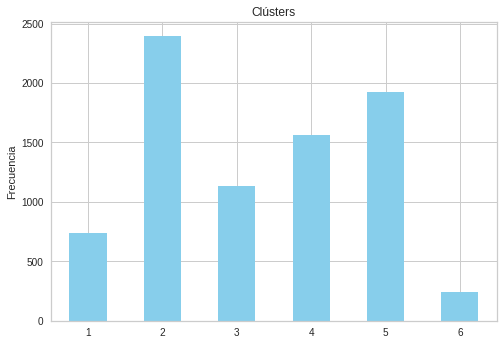

In [30]:
g = datos.cluster.value_counts().sort_index().plot(kind='bar', 
                                                rot=0, 
                                                color='skyblue',
                                                )
g.set(ylabel='Frecuencia', title='Clústers')
plt.show()

In [33]:
datos['cluster'] = datos['cluster'].astype(str)

In [34]:
datos.columns

Index(['Temperature', 'Humidity', 'Humex', 'CO2', 'Bright', 'cluster'], dtype='object')

In [35]:
muestra = datos_escalados.sample(4000)

In [36]:
fig = px.scatter_3d(datos, 
                    x='Humidity', y='Temperature', z='Bright',
                    color='cluster',
                    title="3D Scatter Plot", 
                    #size='CO2'
                    )
fig.update_traces(marker=dict(size=3,),
                  selector=dict(mode='markers'))

fig.show()

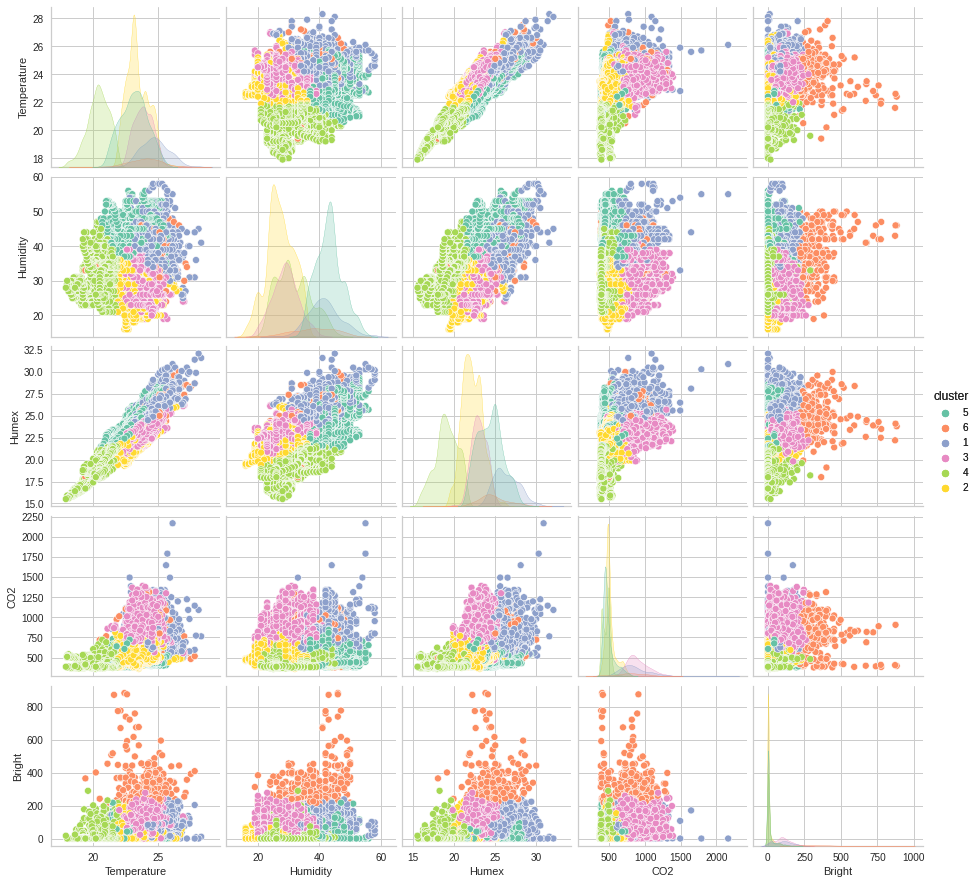

In [37]:
mediciones = ['cluster', 'Temperature', 'Humidity', 'Humex', 'CO2', 'Bright']


g = sns.pairplot(datos[mediciones], hue='cluster', palette='Set2', )
g.add_legend()
plt.show()

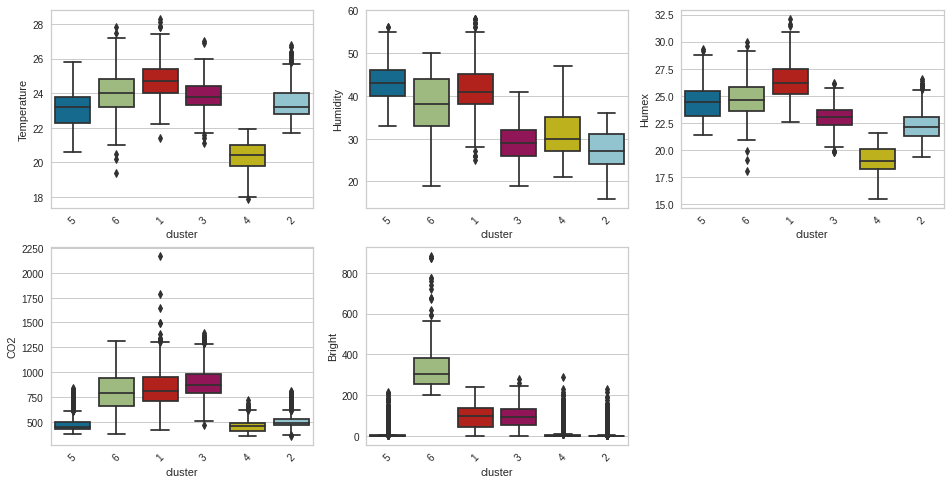

In [38]:

fig, ax = plt.subplots(2, 3, figsize=(16, 8))
for var, subplot in zip(mediciones[1:], ax.flatten()):
    sns.boxplot(x = 'cluster', y = var, data = datos, ax=subplot, showfliers=True)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
ax.flat[-1].set_visible(False) 